# **Melanoma Detection Assignment**

# Introduction and Background  

## Overview of the Problem  

Melanoma is one of the most dangerous forms of skin cancer due to its rapid spread if not detected early. It accounts for **75% of skin cancer-related deaths**, making early and accurate detection critical. This project aims to build a **custom Convolutional Neural Network (CNN)** that can classify skin lesions into multiple categories, with a **special emphasis on detecting melanoma**.  

The dataset, sourced from the **International Skin Imaging Collaboration (ISIC)**, consists of labeled images of both malignant and benign skin conditions. Automating melanoma detection with a machine learning solution can **reduce manual effort**, **accelerate diagnosis**, and **improve patient outcomes**.  

## Business and Clinical Relevance  

Manual diagnosis of skin lesions by dermatologists is **time-consuming** and **resource-intensive**, often leading to delays and risks of human error. This project addresses these challenges by:  

- **Reducing Dermatologists’ Workload:** Automating lesion classification helps prioritize high-risk cases for further review.  
- **Improving Diagnostic Accuracy:** Early and automated detection can prevent missed melanoma cases and enable timely treatment.  
- **Enhancing Healthcare Efficiency:** Faster diagnosis reduces costs, improves workflow, and increases access to care in underserved areas.  

This solution aligns technological advancements with clinical needs to improve the **efficiency** and **effectiveness** of melanoma detection.  

## Goals and Objectives  

The primary objective of this project is to develop a **custom CNN model** capable of accurately classifying skin lesion images into the following **nine distinct categories**:  

- Actinic keratosis  
- Basal cell carcinoma  
- Dermatofibroma  
- Melanoma  
- Nevus  
- Pigmented benign keratosis  
- Seborrheic keratosis  
- Squamous cell carcinoma  
- Vascular lesion  

### Secondary Objectives:  
1. **Focus on Melanoma Detection:** Ensure the model prioritizes the accurate identification of melanoma.  
2. **Address Class Imbalance:** Use the **Augmentor library** to balance underrepresented classes in the dataset.  
3. **Improve Model Generalization:** Implement data augmentation and regularization to address overfitting and underfitting.  
4. **Optimize Training:** Train the model for **20-30 epochs** using appropriate optimizers and loss functions to improve accuracy and performance.  

By meeting these objectives, the project will deliver a reliable and scalable tool for detecting melanoma and other skin conditions.  

## Dataset Information  

The dataset, provided by the **ISIC**, consists of **2357 images** representing the **nine categories** of skin lesions listed above. The images are organized into **training** and **test** directories. However, the dataset exhibits slight **class imbalance**, with some categories having fewer samples.  

### Key Preprocessing Steps:  
- **Resizing:** All images are resized to **180x180** pixels to standardize input dimensions.  
- **Normalization:** Pixel values are rescaled between (0,1) for better model convergence.  
- **Class Distribution Analysis:** Analyzing the distribution to identify underrepresented classes and implement balancing strategies.  

This dataset serves as the foundation for training and evaluating a CNN model that can detect melanoma while maintaining accuracy across all skin lesion categories.  


<a name="general-information"></a>
### **General Information**

**Background**

  This project is part of the PG Program in AI & ML program, specifically within a Deep Learning course.

**Goal**

  To build a CNN based model which can accurately detect melanoma.

**Business Problem**

  Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Dataset**

  The dataset consists of 2357 images which were formed from the International Skin Imaging Collaboration (ISIC).

  The data set contains the following skin diseases:

*   Actinic keratosis
*   Basal cell carcinoma
*   Dermatofibroma
*   Melanoma
*   Nevus
*   Pigmented benign keratosis
*   Seborrheic keratosis
*   Squamous cell carcinoma
*   Vascular lesion


<a name="importing-libraries"></a>
### **Importing all the important libraries**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
import random
from glob import glob
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img

# Reading & Understanding the Data

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Defining Paths for Train and Test Images**

In [15]:
# Root path to the dataset folder
base_path = '/content/gdrive/MyDrive/CNN/Skin cancer ISIC'

# Paths to the Train and Test directories
data_dir_train = pathlib.Path(base_path + '/Train')
data_dir_test = pathlib.Path(base_path + '/Test')

# Counting the number of images in Train and Test folders
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of test images: {image_count_test}")

Number of training images: 2239
Number of test images: 118


**Dataset Summary**

In [16]:
def count_images_in_subfolders(directory):
    print(f"\nCounting images in: {directory}")
    total_count = 0
    class_counts = {}

    # Loop through each subfolder
    for subfolder in directory.iterdir():
        if subfolder.is_dir():
            image_count = len(list(subfolder.glob('*.jpg')))
            class_counts[subfolder.name] = image_count
            print(f"{subfolder.name}: {image_count} images")
            total_count += image_count

    # Calculate class distribution percentages
    print(f"\nClass Distribution Percentages:")
    for class_name, count in class_counts.items():
        percentage = (count / total_count) * 100
        print(f"{class_name}: {percentage:.2f}%")

    print(f"\nTotal images in {directory.name}: {total_count}")
    return class_counts

# Count images in Train and Test folders
count_images_in_subfolders(data_dir_train)
count_images_in_subfolders(data_dir_test)


Counting images in: /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train
melanoma: 438 images
nevus: 357 images
seborrheic keratosis: 77 images
vascular lesion: 139 images
actinic keratosis: 114 images
dermatofibroma: 95 images
pigmented benign keratosis: 462 images
basal cell carcinoma: 376 images
squamous cell carcinoma: 181 images

Class Distribution Percentages:
melanoma: 19.56%
nevus: 15.94%
seborrheic keratosis: 3.44%
vascular lesion: 6.21%
actinic keratosis: 5.09%
dermatofibroma: 4.24%
pigmented benign keratosis: 20.63%
basal cell carcinoma: 16.79%
squamous cell carcinoma: 8.08%

Total images in Train: 2239

Counting images in: /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Test
melanoma: 16 images
squamous cell carcinoma: 16 images
vascular lesion: 3 images
dermatofibroma: 16 images
pigmented benign keratosis: 16 images
seborrheic keratosis: 3 images
basal cell carcinoma: 16 images
actinic keratosis: 16 images
nevus: 16 images

Class Distribution Percentages:
melanoma: 13.56%
squa

{'melanoma': 16,
 'squamous cell carcinoma': 16,
 'vascular lesion': 3,
 'dermatofibroma': 16,
 'pigmented benign keratosis': 16,
 'seborrheic keratosis': 3,
 'basal cell carcinoma': 16,
 'actinic keratosis': 16,
 'nevus': 16}

Findings:

*Training Dataset:*
- **Total Images:** 2239
- **Class Distribution:**
  - **Major Classes:**
    - Pigmented benign keratosis (20.63%, 462 images)
    - Melanoma (19.56%, 438 images)
    - Basal cell carcinoma (16.79%, 376 images)
  - **Minor Classes:**
    - Seborrheic keratosis (3.44%, 77 images)
    - Vascular lesion (6.21%, 139 images)
    - Actinic keratosis (5.09%, 114 images)
- **Observation:** The training dataset exhibits class imbalance, with certain classes like seborrheic keratosis and vascular lesions underrepresented.

*Test Dataset*:
- **Total Images:** 118
- **Class Distribution:**
  - Each major class (e.g., Melanoma, Squamous cell carcinoma, Nevus) has 16 images (13.56% each).
  - Minor classes like Seborrheic keratosis and Vascular lesions have only 3 images (2.54% each).
- **Observation:** The test dataset is more balanced than the training dataset but still has underrepresentation for certain minor classes.

#### Key Insight:
While the test dataset is relatively uniform in distribution, the training dataset requires augmentation to address the significant class imbalance for optimal model performance.


Found 2239 files belonging to 9 classes.


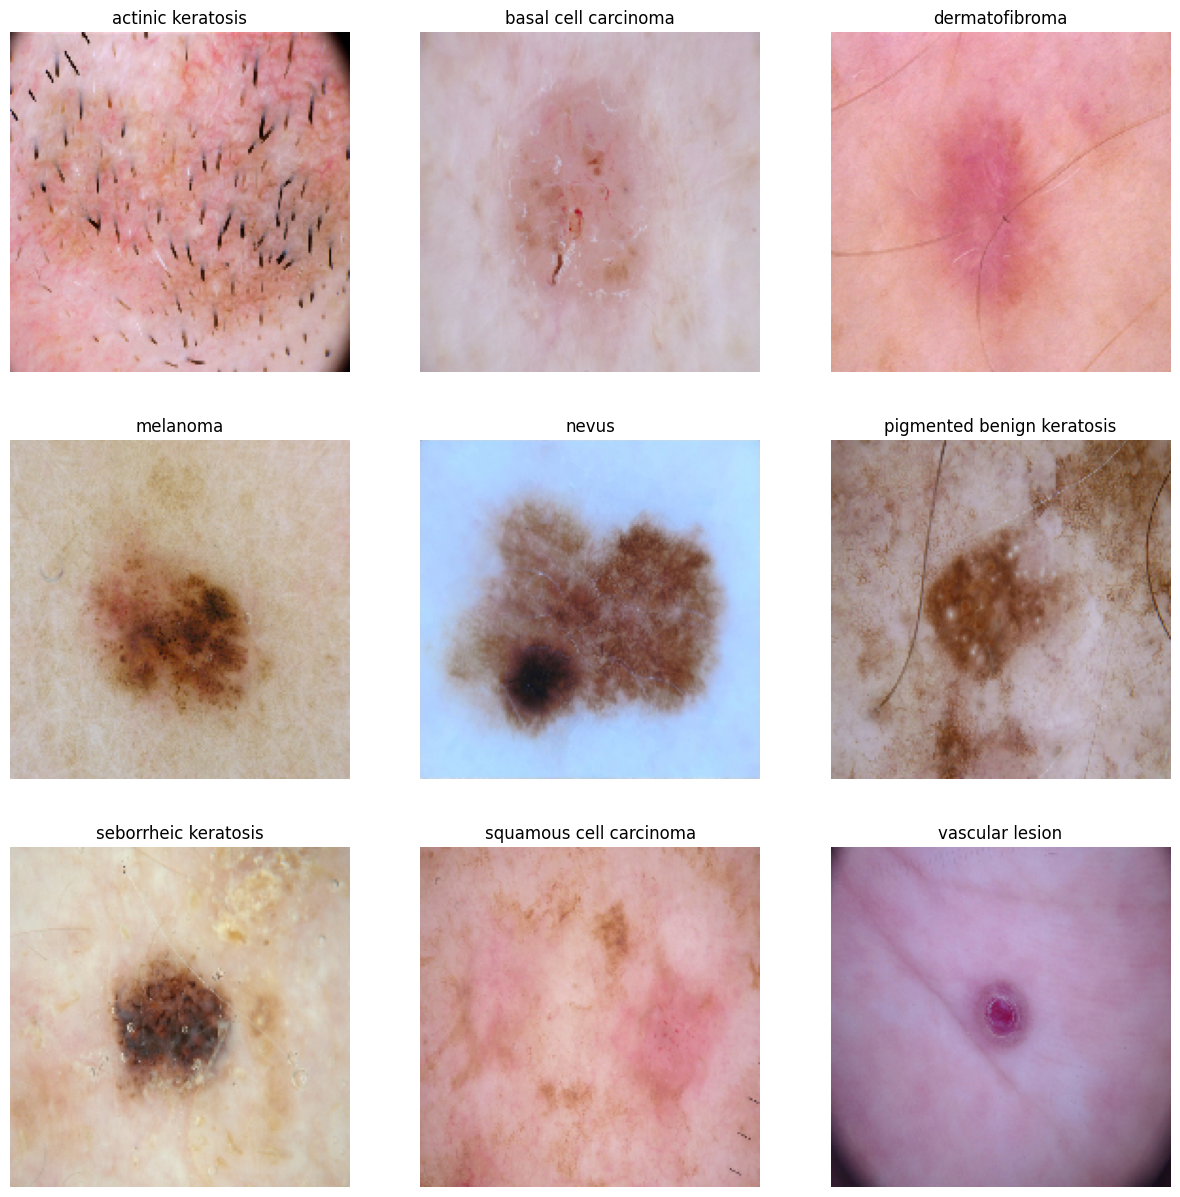

In [17]:
# Visualizing One Instance from Each Class in the Dataset

# Using image_dataset_from_directory() to create a dataset that yields batches of labeled images
# label_mode is set to 'categorical' for one-hot encoding of class labels
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=32, image_size=(180, 180), label_mode='categorical', seed=123
)

# Get the names of all the classes (skin cancer types)
class_names = image_dataset.class_names

# Dictionary to store image paths for each class
files_path_dict = {}

# Loop through each class to gather image paths
for c in class_names:
    files_path_dict[c] = list(map(lambda x: str(data_dir_train) + '/' + c + '/' + x, os.listdir(str(data_dir_train) + '/' + c)))

# Visualize an image from each class
plt.figure(figsize=(15, 15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3, 3, index)

    # Load and display the image
    plt.imshow(load_img(path_list[0], target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")


As we can see, each class has unique characteristics.

In [18]:
# Define a function to count and analyze the distribution of images in each class

def class_distribution_count(directory):
    # Initialize a list to store image counts for each class
    count = []

    # Count the number of images in each class directory
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))

    # Get the names of the classes (sub-directories)
    sub_directory = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

    # Create a DataFrame with class names and corresponding image counts
    df = pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Images'])

    # Sort the DataFrame in ascending order of image counts
    df = df.sort_values(by='No. of Images', ascending=True)

    # Return the sorted DataFrame
    return df

# Call the function to get the class distribution and image count
class_distribution_df = class_distribution_count(data_dir_train)

# Display the DataFrame
class_distribution_df

Class  No. of Images
2        seborrheic keratosis             77
5              dermatofibroma             95
4           actinic keratosis            114
3             vascular lesion            139
8     squamous cell carcinoma            181
1                       nevus            357
7        basal cell carcinoma            376
0                    melanoma            438
6  pigmented benign keratosis            462

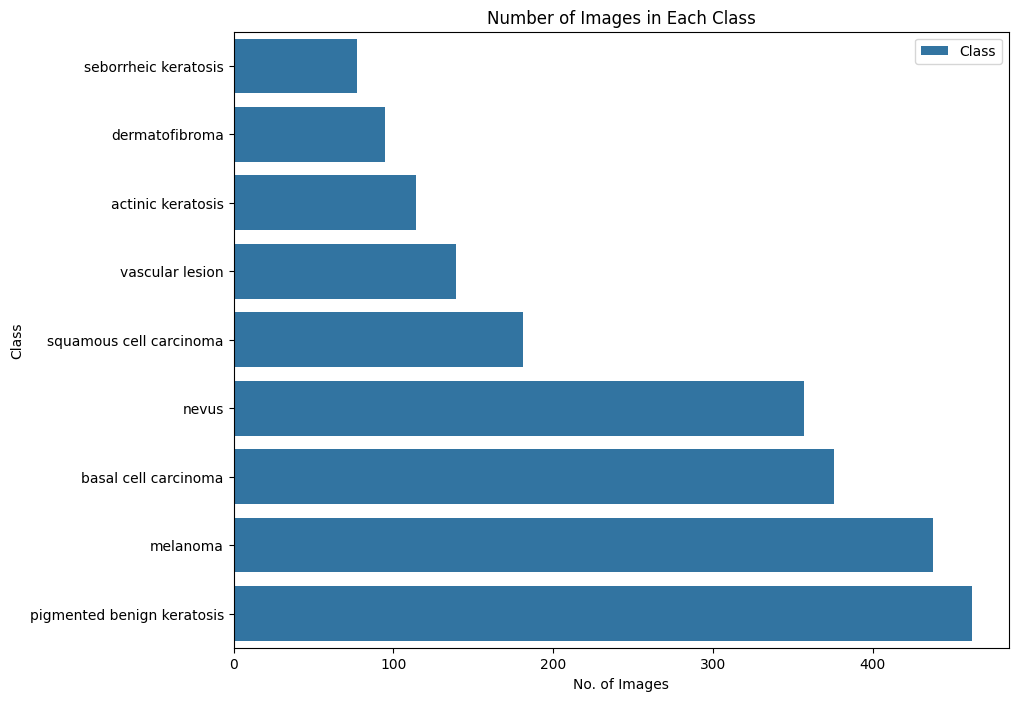

In [19]:
# Visualize the Number of Images in Each Class

# Import the seaborn library for data visualization
import seaborn as sns

# Set the size of the plot figure
plt.figure(figsize=(10, 8))

# Create a bar plot using seaborn
# x-axis: Number of Images
# y-axis: Class names
# Data source: df DataFrame
# Label: "Class"
sns.barplot(x="No. of Images", y="Class", data= class_distribution_df, label="Class")

# Add a title to the plot
plt.title("Number of Images in Each Class")

# Display the plot
plt.show()

<a name="data-preparation-and-initial-assessment"></a>
### **Data preparation and initial assessment**


#### Clean up dataset



In [20]:
# Safe clean up of output folders (if any) created by augumentor in previous execution
import shutil
path_to_training_dataset=str(data_dir_train) + '/'

for folder_name in os.listdir(path_to_training_dataset):
    output_folder = os.path.join(path_to_training_dataset, folder_name, "output")
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)
        print(f"Deleted output folder for class: {folder_name}")
    else:
        print(f"Output folder for class {folder_name} not found. No action required.")

Output folder for class melanoma not found. No action required.
Output folder for class nevus not found. No action required.
Output folder for class seborrheic keratosis not found. No action required.
Output folder for class vascular lesion not found. No action required.
Output folder for class actinic keratosis not found. No action required.
Output folder for class dermatofibroma not found. No action required.
Output folder for class pigmented benign keratosis not found. No action required.
Output folder for class basal cell carcinoma not found. No action required.
Output folder for class squamous cell carcinoma not found. No action required.


#### Data Preparation

In [21]:
# Define default parameters
batch_size = 32
img_height = 180
img_width = 180

In [22]:
# Loading images from directory using Keras.

# Training Data Set :: 80% of images from Train Directory
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="training",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
)

# Validation Data Set :: 20% of images from Train Directory
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="validation",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
)

# Test Data Set :: All images from Test Directory
test_ds = image_dataset_from_directory(
    directory=data_dir_test,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False,
    seed=123
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


In [23]:
# Get Class names for further reference
class_names = train_ds.class_names
num_classes =len(class_names)
print('Class Count        :', num_classes)
print('Categories/Classes :', class_names)

# Print batch shape
for image_batch, labels_batch in train_ds:
    print('Image  Batch Shape : ',image_batch.shape)
    print('Labels Batch Shape : ',labels_batch.shape)
    break

Class Count        : 9
Categories/Classes : ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Image  Batch Shape :  (32, 180, 180, 3)
Labels Batch Shape :  (32,)


The `image_batch` is a tensor with the shape `(32, 180, 180, 3)`, representing a batch of 32 images, each with dimensions `180x180x3` (where the last dimension corresponds to the RGB color channels). The `label_batch` is a tensor with the shape `(32,)`, containing the labels associated with these 32 images.


In [24]:
# Load dataset to cache for faster access
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds= train_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a name="Reusable-functions"></a>
### **Define Reusable Functions**
Defining functions for all steps in model building, evaluation

In [25]:
# Function to compile model and print model summary. Returns Model for further processing
def compile_model(model):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  model.summary()
  return model

In [26]:
# Function to train model. Returns history, best model and epochs trained for further processing
# Earlystopping is set with monitoring on val_accuracy and patience level 10
def train_model(model, train_ds, val_ds,epochs):
  from tensorflow.keras.models import load_model

  checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)
  earlystop = EarlyStopping(monitor='val_accuracy', patience=10,mode='max', verbose=1)

  history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      callbacks=[checkpoint, earlystop]
  )

  best_model = load_model("best_model.keras")

  if earlystop.stopped_epoch==0:
    epoch_range=epochs
  else:
    epoch_range=earlystop.stopped_epoch+1

  return history,best_model,epoch_range

In [27]:
# Function to plot accuray & loss
def plot_accuracy_loss(history,epoch_range):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epoch_range)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [28]:
# Function to predict for a random image in random class
def predict_model(trained_model):
  loss, accuracy = trained_model.evaluate(test_ds)
  print('Test accuracy:', accuracy)

  print('\nPrediction Random Image from Random Class :\n')

  random_class=class_names[random.randint(0, 8)]
  random_image_path = random.choice(glob(os.path.join(data_dir_test, random_class, '*')))

  Test_image = load_img(random_image_path,target_size=(180,180,3))
  plt.imshow(Test_image)
  plt.grid(False)

  img = np.expand_dims(Test_image,axis=0)
  pred = trained_model.predict(img)
  pred = np.argmax(pred)
  pred_class = class_names[pred]
  print("Actual Class "+ random_class +'\n'+ "Predictive Class "+pred_class )
  plt.axis('off')
  plt.show()

### **Model #1 - With Normalization**

*   CNN model with normalization and three convolution layers
*   No dropout or regularization used in this initial model.

In [29]:
# Define the CNN model
model = Sequential([
  layers.InputLayer(shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
# Compile model
model=compile_model(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train model with 20 epochs
history,best_model,epoch_range = train_model(model, train_ds, val_ds,20)

Epoch 1/20
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2189 - loss: 2.0870
Epoch 1: val_accuracy improved from -inf to 0.43848, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 236ms/step - accuracy: 0.2233 - loss: 2.0774 - val_accuracy: 0.4385 - val_loss: 1.6784
Epoch 2/20
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4352 - loss: 1.6243
Epoch 2: val_accuracy improved from 0.43848 to 0.50112, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4349 - loss: 1.6247 - val_accuracy: 0.5011 - val_loss: 1.4918
Epoch 3/20
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5019 - loss: 1.4447
Epoch 3: val_accuracy did not improve from 0.50112
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5020 - loss: 1.4436 - val_accuracy: 0.4765 - val_loss: 1.4609
Epoch 4/20
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5423 - loss: 1.3133
Epoch 4: val_accuracy improved from 0.50112 to 0.50559, saving model to best_model.k

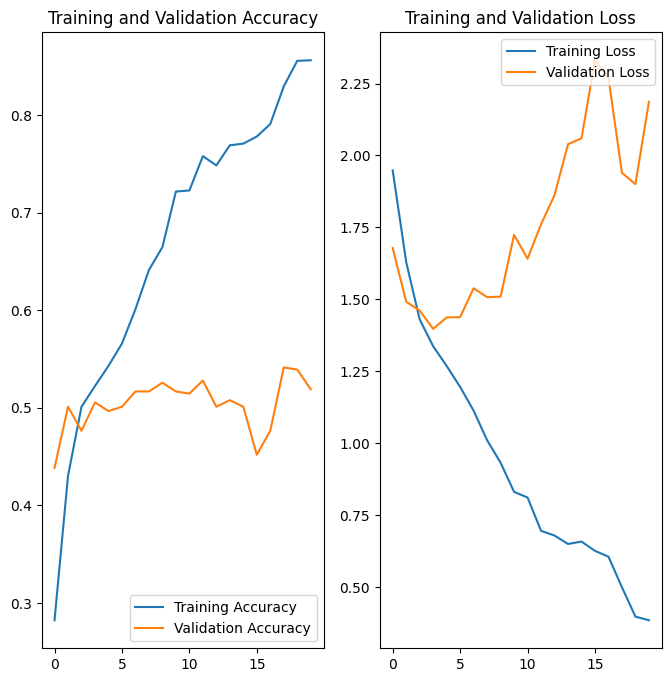

In [32]:
# Plot accurancy and loss
plot_accuracy_loss(history,epoch_range)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2251 - loss: 5.5580
Test accuracy: 0.23728813230991364

Prediction Random Image from Random Class :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Actual Class pigmented benign keratosis
Predictive Class basal cell carcinoma


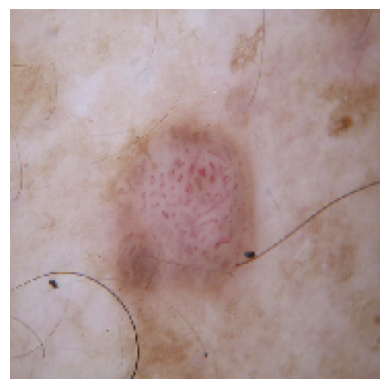

In [33]:
# Predict using trained model
predict_model(best_model)

**Findings:**


*   The model exhibits overfitting, with training accuracy reaching 88%, while validation accuracy remains at 56%.
*   Test accuracy is 39%.







### **Model #2 - With Data Augmentation, Normalization & Dropout**


* To address overfitting observed in the previous model, data augmentation and dropouts are introduced.  
* A CNN model is implemented with data augmentation techniques (flip, rotation, zoom, brightness, and contrast), normalization, and three convolutional layers incorporating dropouts.



In [34]:
# Define data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.InputLayer(shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
])

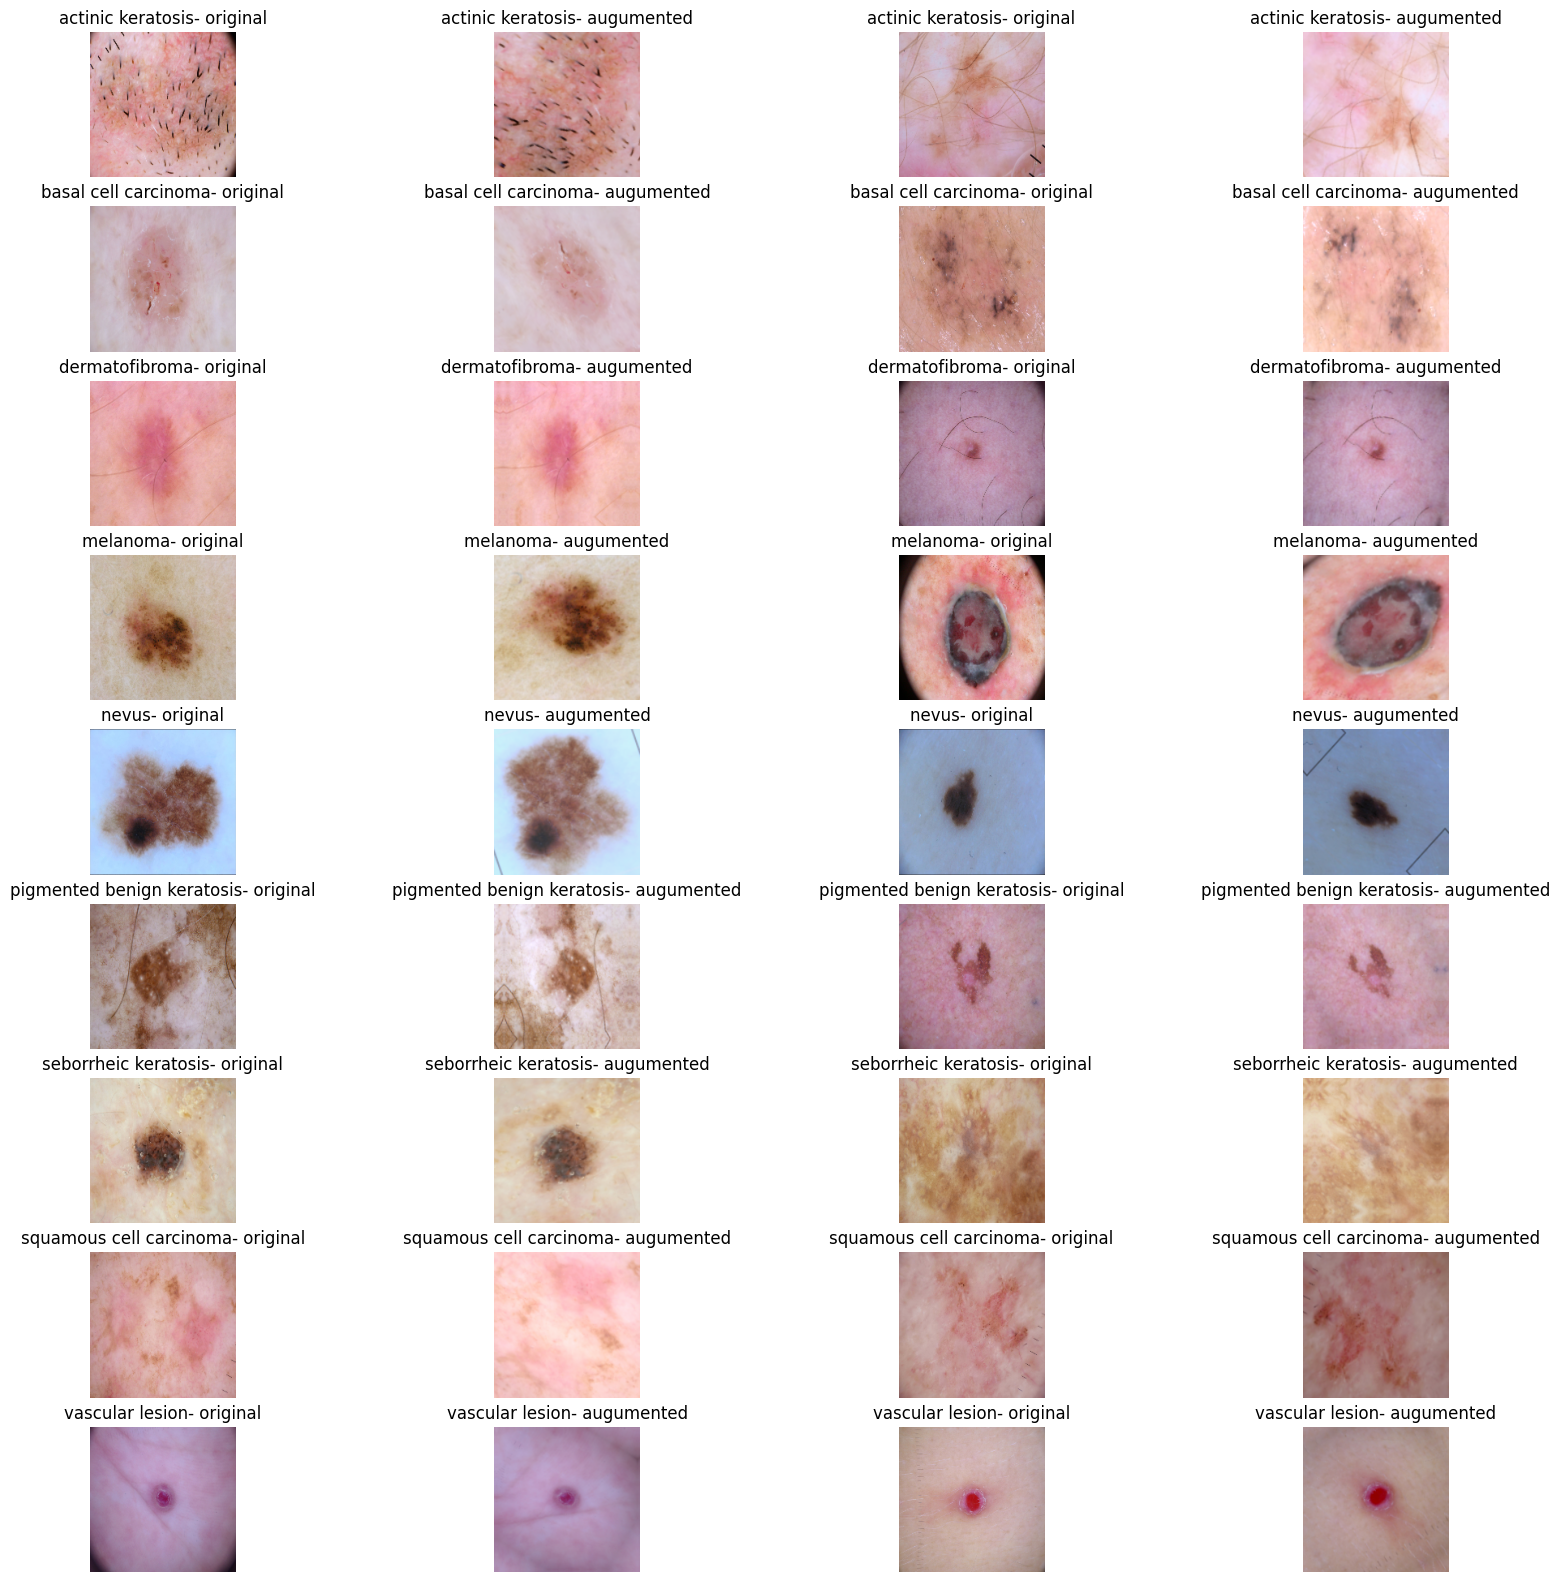

In [35]:
# Plot two images from each class to visualize impact of data augmentation
plt.figure(figsize=(20, 20))
i=0
for category in class_names:
  cat_path=os.path.join(data_dir_train, category)
  image_files = os.listdir(cat_path)
  for j in range(2):
    img = plt.imread(os.path.join(cat_path,image_files[j]))
    img = tf.image.resize(img, [img_height, img_width])

    i += 1
    plt.subplot(9, 4, i)
    plt.imshow(img.numpy().astype("uint8"))
    plt.title(category + '- original')
    plt.axis('off')

    i += 1
    plt.subplot(9, 4, i)
    img_batch = tf.expand_dims(img, axis=0)
    plt.imshow(data_augmentation(img_batch).numpy()[0].astype("uint8"))
    plt.title(category + '- augumented')
    plt.axis('off')
plt.show()

In [36]:
# Define the CNN model
model = Sequential([
  layers.InputLayer(shape=(img_height, img_width, 3)),
  data_augmentation,      # Added data augmentation layers
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),   # Added dropout
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),   # Added dropout
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),   # Added dropout
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
# Compile model
model=compile_model(model)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train model
history,best_model,epoch_range = train_model(model, train_ds, val_ds,20)

Epoch 1/20
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1820 - loss: 4.1789
Epoch 1: val_accuracy improved from -inf to 0.20582, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1822 - loss: 4.1290 - val_accuracy: 0.2058 - val_loss: 2.0646
Epoch 2/20
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2288 - loss: 2.0217
Epoch 2: val_accuracy did not improve from 0.20582
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2285 - loss: 2.0217 - val_accuracy: 0.1924 - val_loss: 2.0213
Epoch 3/20
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2584 - loss: 1.9615
Epoch 3: val_accuracy improved from 0.20582 to 0.31991, saving model to best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2587 - loss: 1.9614 - val_accuracy: 0.3199 - val_loss: 1.9339
Epoch 4/20
55/56 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3054 - loss: 1.8944
Epoch 4: val_accuracy did not improve from 0.31991
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/

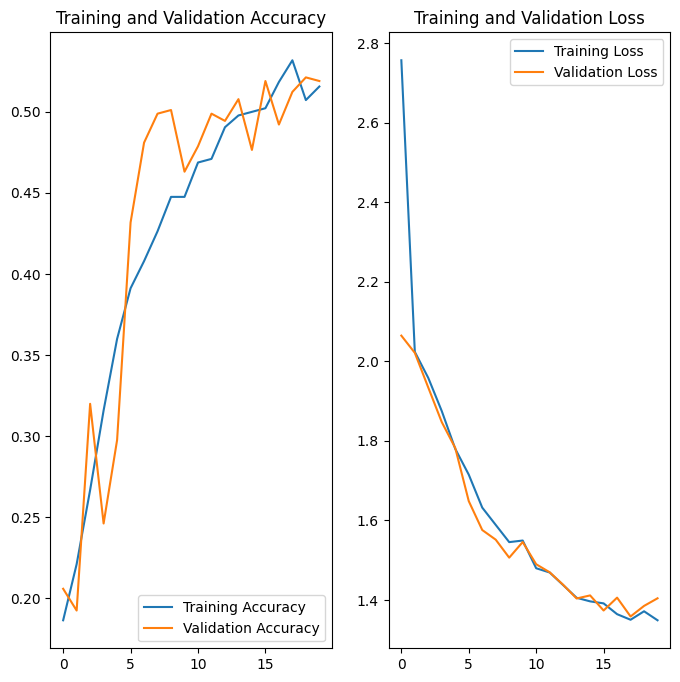

In [39]:
# Plot accurancy and loss
plot_accuracy_loss(history,epoch_range)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.3833 - loss: 1.9704
Test accuracy: 0.39830508828163147

Prediction Random Image from Random Class :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


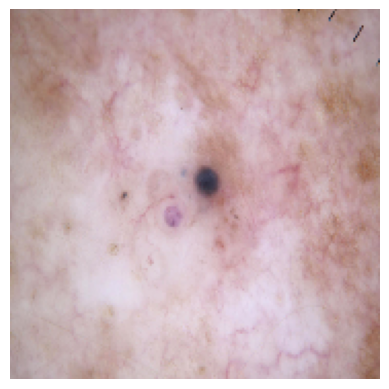

In [40]:
# Predict using trained model
predict_model(best_model)

**Findings:**


* The overfitting issue has been resolved; however, an underfitting issue has emerged, with training accuracy at 51%.  
* Test accuracy is at 30%, but random predictions were successful.


<a name="handle-class-imbalance"></a>
### **Handle Class Imbalance using Augmentor**


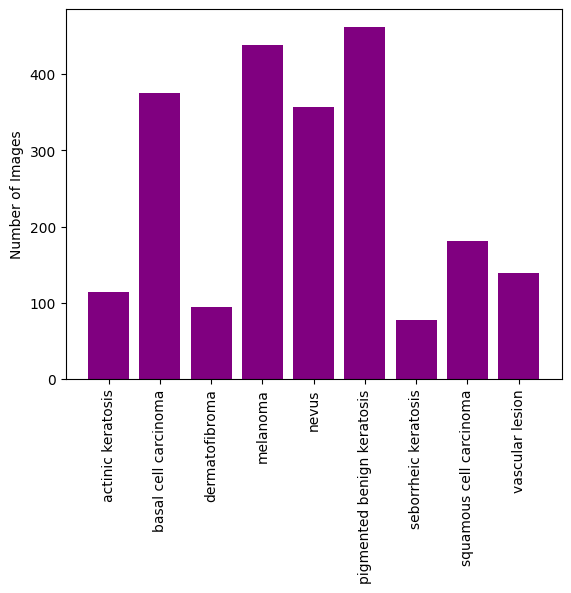

In [41]:
# Plot number of images per each class/category
counts = [len(os.listdir(os.path.join(data_dir_train, cat))) for cat in class_names]

plt.bar(class_names, counts,color='purple')
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

The bar plot above clearly highlights the class imbalance in the dataset.  

* The 'pigmented benign keratosis' class has the highest number of images.  
* The 'seborrheic keratosis' class has the lowest number of images.  

In [42]:
# Install Augmentor to create augmented images to mitigate class imbalance
!pip install Augmentor

In [43]:
# Create a pipeline using Augmentor to generate augmented images for the minor classes.
# Augmentation is applied proportionally to the original counts and includes various techniques such as rotation, flipping, zooming, and cropping.

import Augmentor
num_augmented_images_max = 1000 #Minimum images intended for each class

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    num_original_images = len(glob(os.path.join(class_path, '*.jpg')))

    if num_original_images < num_augmented_images_max:
        p = Augmentor.Pipeline(class_path)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.flip_left_right(probability=0.3)
        p.zoom(probability=0.3, min_factor=1.1, max_factor=1.5)
        p.crop_random(probability=0.3, percentage_area=0.8)

        num_augmented_images=num_augmented_images_max - num_original_images #Images to be augmented

        p.sample(num_augmented_images)
        print(f"====> Class '{class_name}' |  Original Images : {num_original_images} | Augmented Images : {num_augmented_images}")
    else:
        print(f"====> {class_name} is not a minor class (has {num_original_images} images). Skipping augmentation.")

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED4216DF00>: 100%|██████████| 886/886 [00:10<00:00, 86.79 Samples/s]


====> Class 'actinic keratosis' |  Original Images : 114 | Augmented Images : 886
Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=480x360 at 0x7FED42172470>: 100%|██████████| 624/624 [00:07<00:00, 85.43 Samples/s]


====> Class 'basal cell carcinoma' |  Original Images : 376 | Augmented Images : 624
Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=480x360 at 0x7FED421C9B10>: 100%|██████████| 905/905 [00:10<00:00, 83.88 Samples/s]


====> Class 'dermatofibroma' |  Original Images : 95 | Augmented Images : 905
Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEDEB27D9F0>: 100%|██████████| 562/562 [00:27<00:00, 20.26 Samples/s]


====> Class 'melanoma' |  Original Images : 438 | Augmented Images : 562
Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7FED6E53EB30>: 100%|██████████| 643/643 [00:25<00:00, 24.98 Samples/s]


====> Class 'nevus' |  Original Images : 357 | Augmented Images : 643
Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED8FFC1990>: 100%|██████████| 538/538 [00:06<00:00, 83.66 Samples/s] 


====> Class 'pigmented benign keratosis' |  Original Images : 462 | Augmented Images : 538
Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=819x614 at 0x7FEDEA45F0A0>: 100%|██████████| 923/923 [00:18<00:00, 49.33 Samples/s]


====> Class 'seborrheic keratosis' |  Original Images : 77 | Augmented Images : 923
Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDEA45EF20>: 100%|██████████| 819/819 [00:09<00:00, 88.71 Samples/s]


====> Class 'squamous cell carcinoma' |  Original Images : 181 | Augmented Images : 819
Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED53DEB310>: 100%|██████████| 861/861 [00:10<00:00, 83.59 Samples/s]

====> Class 'vascular lesion' |  Original Images : 139 | Augmented Images : 861


In [44]:
# Augmentor saves the augmented images in the 'output' sub-directory within each class folder.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6761


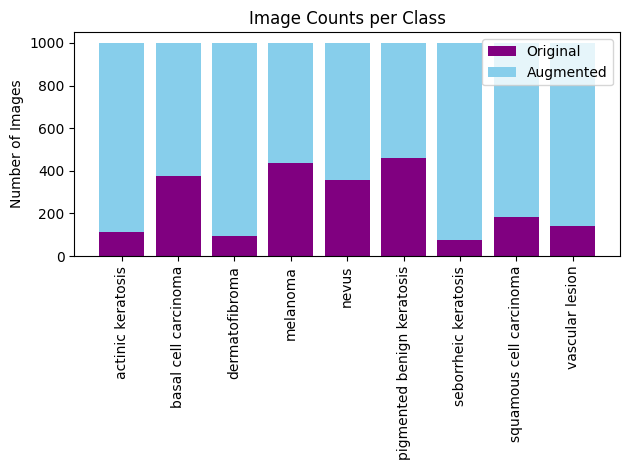

In [45]:
# Plot train dataset with augmented data
original_img_counts = {category: len(list(glob(os.path.join(data_dir_train, category, '*.jpg')))) for category in class_names}
augmented_img_counts = {category: len(list(glob(os.path.join(data_dir_train, category, 'output', '*.jpg')))) for category in class_names}

fig, ax = plt.subplots()
# Pass class_names as x and the corresponding values from original_img_counts as height
ax.bar(class_names, [original_img_counts.get(name, 0) for name in class_names], label='Original',color='purple')
ax.bar(class_names, [augmented_img_counts.get(name, 0) for name in class_names], bottom=[original_img_counts.get(name, 0) for name in class_names], label='Augmented',color='skyblue')

ax.set_ylabel('Number of Images')
ax.set_title('Image Counts per Class')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

After augmentation, all classes in the training dataset now have an equal number of samples.  



In [46]:
# Re-Define Training and Validation Datasets Using Original and Augmented Data

# Training Dataset: 70% of images from the Train and Augmented directories
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='int',
    validation_split=0.3,
    subset="training",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
)

# Validation Data Set: 30% of images from Train + Augmented Directory
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    labels='inferred',
    label_mode='int',
    validation_split=0.3,
    subset="validation",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False,
    seed=123
)

Found 9000 files belonging to 9 classes.
Using 6300 files for training.
Found 9000 files belonging to 9 classes.
Using 2700 files for validation.


In [47]:
# Cache new datasets
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Findings:**

*   Class imbalance was addressed using Augmentor, which added augmented images to the respective class directories based on the original image count.
*   After augmentation, all classes now have an equal number of samples, effectively resolving class imbalance.
*   The train/validation split was adjusted to 30%, resulting in 6,300 images for training and 2,700 images for validation. The test dataset remains unchanged, with a total of 118 images.







### **Model #3 - With Augmented (Class Balanced) Data**

*   Model with normalization, three convolutional layers with dropouts
*   Trained on Augmented/Class Balanced data

In [48]:
# Define the CNN model
model = Sequential([
  layers.InputLayer(shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
# Compile new model
model=compile_model(model)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train model with 50 epochs
history,best_model,epoch_range = train_model(model, train_ds, val_ds,50)

Epoch 1/50
194/197 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1340 - loss: 2.3601
Epoch 1: val_accuracy improved from -inf to 0.43667, saving model to best_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.1354 - loss: 2.3549 - val_accuracy: 0.4367 - val_loss: 1.3545
Epoch 2/50
196/197 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3923 - loss: 1.5803
Epoch 2: val_accuracy improved from 0.43667 to 0.64667, saving model to best_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.3926 - loss: 1.5796 - val_accuracy: 0.6467 - val_loss: 1.1017
Epoch 3/50
195/197 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4952 - loss: 1.3248
Epoch 3: val_accuracy did not improve from 0.64667
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4952 - loss: 1.3248 - val_accuracy: 0.4359 - val_loss: 1.2591
Epoch 4/50
196/197 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5220 - loss: 1.2773
Epoch 4: val_accuracy improved from 0.64667 to 0.73630, saving model t

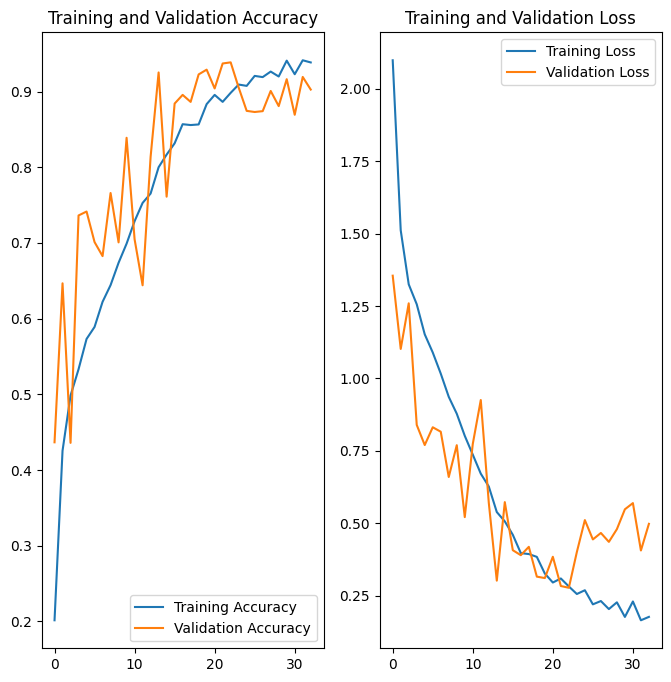

In [51]:
# Plot accurancy and loss
plot_accuracy_loss(history,epoch_range)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.3025 - loss: 7.5509
Test accuracy: 0.3813559412956238

Prediction Random Image from Random Class :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Actual Class melanoma
Predictive Class vascular lesion


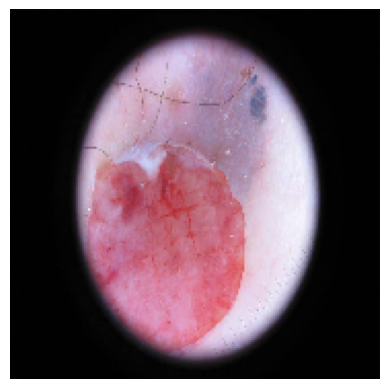

In [52]:
# Predict using trained model
predict_model(best_model)

**Findings:**

*   Augmentor effectively resolved underfitting by addressing class imbalance.  
*   Training accuracy reached 95%, and validation accuracy stands at 94%.  
*   Test accuracy remains suboptimal at approximately 40%.  
*   To enhance detection accuracy, a more complex model should be developed, potentially incorporating alternative architectures or transfer learning.  


# **Summary**

**Technical Conclusion:**

* Three CNN models were developed and evaluated for skin cancer classification.  
* Model 1, without data augmentation or dropout, exhibited overfitting issues.  
* Model 2 included data augmentation and dropout to mitigate overfitting but resulted in underfitting.  
* Model 3 addressed class imbalance using data augmentation via Augmentor, achieving improved training accuracy (95%) and validation accuracy (94%).  
* Despite these advancements, test accuracy remained relatively low (~40%). Further exploration of more complex architectures or transfer learning is recommended for enhanced performance.  
* The data augmentation strategy using Augmentor effectively balanced the class distribution in the training dataset, significantly contributing to improved model outcomes.  

**Business Conclusion:**

* The developed model demonstrates the potential for automated skin cancer classification. While the current accuracy (~40% on test data) is not yet suitable for clinical application, it establishes a strong foundational step.  
* Future enhancements focusing on model architecture and leveraging larger, more diverse datasets could greatly improve diagnostic accuracy.  
* This technology has the potential to assist dermatologists in preliminary screenings, enabling earlier detection and better patient outcomes.  
* Further research and development are required before clinical deployment. A more robust model with higher accuracy and validated performance is essential for real-world implementation.  
